<h3> Richa Phulwani - OLA 6 </h3>

In [87]:
import keras
from keras import backend as K
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

In [49]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
for filename in os.listir('/TrashNet-Dataset/glass')

x_train = np.concatenate([grab_image('/nfshome/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])
x_train = x_train.astype('float32').reshape(x_train.shape)
x_train /= 100
x_train.shape

(100, 100, 100, 3)

In [50]:
y_train = np.loadtxt('/nfshome/sandbox/xception_example/class_labels.csv')
y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))

y_train.shape

(100, 2)

In [73]:
model = keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...
model.add(keras.layers.Conv2D(64, kernel_size=(8, 8),
activation='relu',
input_shape=[x_train.shape[1],
x_train.shape[2],
x_train.shape[3]]))
model.add(keras.layers.Conv2D(128, (8, 8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(4, 4)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(y_train.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 93, 93, 64)        12352     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 86, 86, 128)       524416    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 21, 21, 128)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 21, 21, 128)       0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 56448)             0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               7225472   
_________________________________________________________________
dropout_36 (Dropout)         (None, 128)               0         
__________

In [74]:
batch_size = 512
epochs = 50
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1)

Epoch 1/50
100/100 [==============================] - 40s 401ms/step - loss: 0.6926 - acc: 0.6400
Epoch 2/50
100/100 [==============================] - 29s 290ms/step - loss: 0.6614 - acc: 0.6300
Epoch 3/50
100/100 [==============================] - 30s 295ms/step - loss: 0.6631 - acc: 0.6300
Epoch 4/50
100/100 [==============================] - 35s 347ms/step - loss: 0.6610 - acc: 0.6300
Epoch 5/50
100/100 [==============================] - 30s 296ms/step - loss: 0.6497 - acc: 0.6300
Epoch 6/50
100/100 [==============================] - 32s 321ms/step - loss: 0.6493 - acc: 0.6300
Epoch 7/50
100/100 [==============================] - 42s 424ms/step - loss: 0.6474 - acc: 0.6300
Epoch 8/50
100/100 [==============================] - 67s 673ms/step - loss: 0.6386 - acc: 0.6300
Epoch 9/50
100/100 [==============================] - 36s 356ms/step - loss: 0.6270 - acc: 0.6300
Epoch 10/50
100/100 [==============================] - 35s 351ms/step - loss: 0.6058 - acc: 0.6300
Epoch 11/50
100/100

In [75]:
score = model.evaluate(x_train, y_train, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 11s 113ms/step
Test loss: 0.005708853292744607
Test accuracy: 1.0


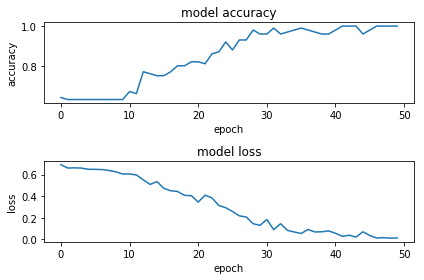

In [76]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()

<h4> Problem 3 </h4>

In [68]:
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input, decode_predictions

In [69]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image('/nfshome/sandbox/xception_example/images/image_%d.JPEG'%(i)) for i in range(100)])
X.shape

(100, 299, 299, 3)

In [78]:
model = Xception(weights='imagenet')

In [86]:
preds = model.predict(X[:,:,:,:])
for i in range(100):
    print('Predicted:', decode_predictions(preds, top=1)[i])

Predicted: [('n01817953', 'African_grey', 0.44841596)]
Predicted: [('n02106550', 'Rottweiler', 0.29953748)]
Predicted: [('n02395406', 'hog', 0.14157927)]
Predicted: [('n02101006', 'Gordon_setter', 0.3929784)]
Predicted: [('n02124075', 'Egyptian_cat', 0.57858574)]
Predicted: [('n02127052', 'lynx', 0.2734335)]
Predicted: [('n02107683', 'Bernese_mountain_dog', 0.97202796)]
Predicted: [('n02123394', 'Persian_cat', 0.55238414)]
Predicted: [('n02093256', 'Staffordshire_bullterrier', 0.4646181)]
Predicted: [('n02123045', 'tabby', 0.27875343)]
Predicted: [('n02123045', 'tabby', 0.24650945)]
Predicted: [('n02124075', 'Egyptian_cat', 0.21868071)]
Predicted: [('n02096585', 'Boston_bull', 0.12376172)]
Predicted: [('n02124075', 'Egyptian_cat', 0.59595346)]
Predicted: [('n02123597', 'Siamese_cat', 0.14436458)]
Predicted: [('n02107312', 'miniature_pinscher', 0.09950582)]
Predicted: [('n02106662', 'German_shepherd', 0.38143304)]
Predicted: [('n02123045', 'tabby', 0.47416684)]
Predicted: [('n04254680',